# Reconhecimento Ótico de Caracteres 

### **IMPORTS**

In [1]:
# Data manipulation
import numpy as np

# Image manipulation
import cv2
import matplotlib.pyplot as plt

# OCR packages
import pytesseract

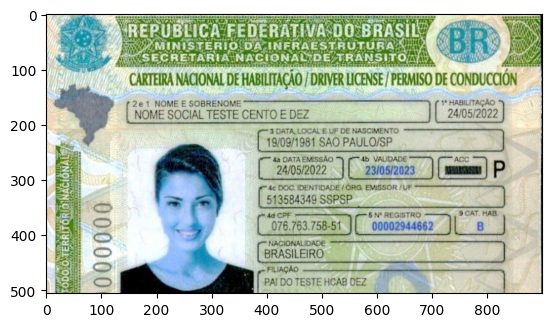

In [2]:
# Imagem original
img = cv2.imread("img_cnh.jpg")
plt.imshow(img)
plt.show()

### **PRÉ-PROCESSAMENTO**

In [3]:
# Pré-Processamento
img_rec = cv2.cvtColor(
    img, 
    cv2.COLOR_BGR2RGB
)

img_rec = cv2.cvtColor(
    img_rec, 
    cv2.COLOR_BGR2GRAY
)

img_rec = cv2.medianBlur(
    img_rec,
    3
)
img_rec = cv2.equalizeHist(
    img_rec
)
img_rec = cv2.GaussianBlur(
    img_rec,
    (5,5),
    0
)


### **DETECÇÃO DE REGIÕES DE INTERESSE**
- Foto
- Nome
- CPF
- Data de Nascimento
- Categoria
- Data de validade

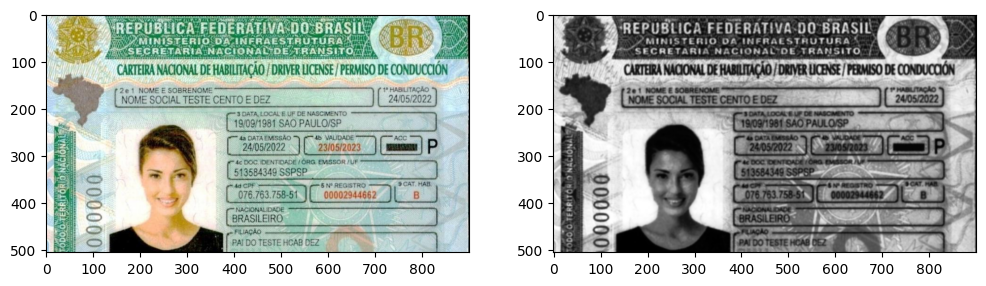

In [6]:

# Mostrar a imagem com a detecção e após ser tratada 
fig, ax = plt.subplots(
    1, 
    2, 
    figsize=(12, 5)
)

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(img_rec, cv2.COLOR_BGR2RGB))

In [5]:
class CNH:
    def __init__(self, nome=None, cpf=None, data_nas=None, categoria=None, validade=None):
        self.nome = nome
        self.cpf = cpf
        self.data_nas = data_nas
        self.categoria = categoria
        self.validade = validade

In [8]:
cnh = CNH()

nome = img[170:200, 140:500]
text_nome = pytesseract.image_to_string(nome)
cnh.nome = text_nome.strip()

cpf = img[370:400, 400:550]
text_cpf = pytesseract.image_to_string(cpf)
cnh.nome = text_cpf.strip()

data_nas = img[220:250, 360:490]
text_data_nas = pytesseract.image_to_string(data_nas)
cnh.nome = text_data_nas.strip()

categoria = img_rec[370:400,780:800]
text_categoria = pytesseract.image_to_string(categoria)
cnh.nome = text_categoria.strip()

validade = img[270:300, 570:680]
text_validade = pytesseract.image_to_string(validade)
cnh.nome = text_validade.strip()

In [9]:
cnh = CNH(nome=text_nome.strip(), cpf=text_cpf.strip(), data_nas=text_data_nas.strip(), categoria=text_categoria.strip(), validade=text_validade.strip())

# Acessar os atributos do objeto CNH
print(cnh.nome)
print(cnh.cpf)
print(cnh.data_nas)
print(cnh.categoria)
print(cnh.validade)

NOME SOCIAL TESTE CENTO E DEZ
_076.763.758-54
19/09/1981

23/05/2023


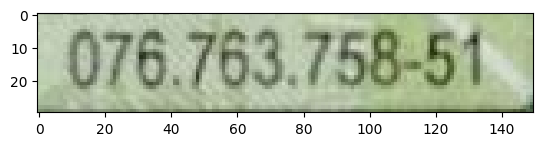

In [10]:

nome = img[170:200, 140:500]
cpf = img[370:400, 400:550]
data_nas = img[220:250, 360:490]
categoria = img_rec[370:400,780:800]
validade = img[270:300, 570:680]

plt.imshow(cpf)
plt.show()

In [ ]:
# Definição de áreas de interesse pelo ROI
x, y, w, h = cv2.selectROI(img_rec)

# Recortar as áreas de interesse da imagem
roi = img_rec[y:y+h, x:x+w]

nome = img[170:200, 140:500]
cpf = img[400:400, 300:550]


plt.imshow(cpf, cmap='gray')



#### **Detecção da foto**

In [ ]:
# Detecção da foto do CNH
cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
face = cascade.detectMultiScale(
		img_rec, 
        scaleFactor=1.1, 
        minNeighbors=3
)

for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Mostrar a imagem com a detecção e após ser tratada 
fig, ax = plt.subplots(
    1, 
    2, 
    figsize=(12, 5)
)

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(img_rec, cv2.COLOR_BGR2RGB))

plt.tight_layout()

### **RECONHECIMENTO ÓPTICO DE CARACTERES - OCR**

In [ ]:
# OCR packages Paddle
ocr = PaddleOCR()

result = ocr.ocr(img_rec,cv2.COLOR_BGR2RGB)
result

In [ ]:
# OCR packages Tesseract
text = pytesseract.image_to_string(img_rec)
print(text)